## EDA - Crop Yield based on Weather and other factors.

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

### Loading the Dataset - Numpy BinaryFile

In [2]:
## Loading the data into data frmae
weather_data = np.load('inputs_weather_train.npy', allow_pickle=False, fix_imports=True)
other_data = np.load('inputs_others_train.npy', allow_pickle=False, fix_imports=True)
yield_data = np.load('yield_train.npy', fix_imports=True, allow_pickle=False)
clusterID_genotype = np.load('clusterID_genotype.npy', fix_imports=True, allow_pickle=False)

weather_test_data = np.load('inputs_weather_test.npy', allow_pickle=False, fix_imports=True)
other_test_data = np.load('inputs_others_test.npy', allow_pickle=False, fix_imports=True)

encoder = LabelEncoder()
scaler = MinMaxScaler(feature_range=(0, 1))
other_data[:, 2] = encoder.fit_transform(other_data[:, 2].reshape(-1, 1))

[row_size, days, properties] = weather_data.shape

weather_df = pd.DataFrame(weather_data.reshape(row_size*days, properties))
other_df = pd.DataFrame(other_data, columns=['MG', 'Genotype_ID', 'State', 'Year', 'Location'], dtype=np.float)
yield_df = pd.DataFrame(yield_data, columns=['Yield'])



/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Feature Abberviation: 
- Average Direct Normal Irradiance (ADNI)
- Average Precipitation (AP)
- Average Relative Humidity (ARH)
- Maximum Direct Normal Irradiance (MDNI)
- Maximum Surface Temperature (MaxSur)
- Minimum Surface Temperature (MinSur)
- Average Surface Temperature (AvgSur)
- 'ADNI','AP','ARH','MDNI','MaxSur','MinSur','AvgSur'

In [3]:
other_df

,MG,Genotype_ID,State,Year,Location
0,3.0,243.0,7.0,2009.0,98.0
1,6.0,114.0,0.0,2013.0,16.0
2,4.0,2878.0,25.0,2015.0,72.0
3,3.0,4535.0,14.0,2014.0,94.0
4,3.0,4501.0,18.0,2008.0,45.0
...,...,...,...,...,...
93023,8.0,1774.0,0.0,2014.0,144.0
93024,4.0,1363.0,5.0,2008.0,17.0
93025,2.0,182.0,6.0,2006.0,150.0
93026,5.0,699.0,9.0,2008.0,1.0


In [4]:
weather_data1 = weather_data.reshape(93028, 7 * 214)

In [5]:
weather_df = pd.DataFrame(weather_data1[:, :7], columns=['ADNI','AP','ARH','MDNI','MaxSur','MinSur','AvgSur'])
weather_df

,ADNI,AP,ARH,MDNI,MaxSur,MinSur,AvgSur
0,169.88,0.00,50.50,814.0,57.3,32.3,43.23
1,209.88,0.00,85.38,760.0,65.3,40.5,54.08
2,346.83,0.00,75.08,975.0,69.0,43.0,55.95
3,230.50,0.00,58.04,1008.0,61.8,29.0,41.98
4,304.71,0.00,73.25,910.0,44.7,31.7,37.08
...,...,...,...,...,...,...,...
93023,179.38,0.00,56.67,941.0,77.5,43.6,60.48
93024,86.46,0.03,86.50,603.0,61.4,41.0,49.33
93025,0.71,0.00,76.04,10.0,55.3,45.2,47.77
93026,36.88,0.02,90.58,361.0,77.4,67.1,70.35


In [6]:
print("Shape of Training Dataset is: ", weather_df.shape)

Shape of Training Dataset is:  (93028, 7)


In [7]:
print("Dimension of Training Dataset is: ", weather_df.ndim)

Dimension of Training Dataset is:  2


In [8]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93028 entries, 0 to 93027
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ADNI    93028 non-null  float64
 1   AP      93028 non-null  float64
 2   ARH     93028 non-null  float64
 3   MDNI    93028 non-null  float64
 4   MaxSur  93028 non-null  float64
 5   MinSur  93028 non-null  float64
 6   AvgSur  93028 non-null  float64
dtypes: float64(7)
memory usage: 5.0 MB


In [9]:
weather_df.describe().style.set_properties(**{"background-color": "#98FB97","color":"black","border-color": "black"})


,ADNI,AP,ARH,MDNI,MaxSur,MinSur,AvgSur
count,93028.000000,93028.000000,93028.000000,93028.000000,93028.000000,93028.000000,93028.000000
mean,204.034307,0.004756,73.846087,703.042235,62.454852,43.526300,51.698732
std,133.190196,0.012245,15.201625,346.879245,13.473442,11.276211,11.726956
min,0.000000,0.000000,23.130000,0.000000,20.500000,8.300000,16.250000
25%,64.080000,0.000000,64.960000,456.000000,53.500000,35.400000,43.230000
50%,242.920000,0.000000,75.830000,894.000000,62.400000,42.900000,51.370000
75%,329.830000,0.010000,85.460000,965.000000,73.300000,52.500000,61.480000
max,380.380000,0.190000,100.000000,1024.000000,89.500000,67.100000,74.130000


In [10]:
weather_df.isnull().sum()

ADNI      0
AP        0
ARH       0
MDNI      0
MaxSur    0
MinSur    0
AvgSur    0
dtype: int64

In [11]:
weather_df.value_counts

<bound method DataFrame.value_counts of          ADNI    AP    ARH    MDNI  MaxSur  MinSur  AvgSur
0      169.88  0.00  50.50   814.0    57.3    32.3   43.23
1      209.88  0.00  85.38   760.0    65.3    40.5   54.08
2      346.83  0.00  75.08   975.0    69.0    43.0   55.95
3      230.50  0.00  58.04  1008.0    61.8    29.0   41.98
4      304.71  0.00  73.25   910.0    44.7    31.7   37.08
...       ...   ...    ...     ...     ...     ...     ...
93023  179.38  0.00  56.67   941.0    77.5    43.6   60.48
93024   86.46  0.03  86.50   603.0    61.4    41.0   49.33
93025    0.71  0.00  76.04    10.0    55.3    45.2   47.77
93026   36.88  0.02  90.58   361.0    77.4    67.1   70.35
93027  344.92  0.00  62.33   984.0    59.8    39.3   47.81

[93028 rows x 7 columns]>

In [12]:
weather_df.corr()

,ADNI,AP,ARH,MDNI,MaxSur,MinSur,AvgSur
ADNI,1.000000,-0.371312,-0.616064,0.930693,0.351836,0.038567,0.199605
AP,-0.371312,1.000000,0.348680,-0.375704,-0.036646,0.137325,0.066776
ARH,-0.616064,0.348680,1.000000,-0.580243,-0.412708,-0.115884,-0.261928
MDNI,0.930693,-0.375704,-0.580243,1.000000,0.324480,0.015130,0.167679
MaxSur,0.351836,-0.036646,-0.412708,0.324480,1.000000,0.849791,0.948397
MinSur,0.038567,0.137325,-0.115884,0.015130,0.849791,1.000000,0.963245
AvgSur,0.199605,0.066776,-0.261928,0.167679,0.948397,0.963245,1.000000


In [13]:
yield_df = pd.DataFrame(yield_data, columns=['Yield'])
yield_df

,Yield
0,39.0
1,54.2
2,73.6
3,70.9
4,82.1
...,...
93023,22.2
93024,68.6
93025,65.6
93026,43.5


In [14]:
train_df = pd.concat([weather_df, yield_df], axis=1, join="inner")
train_df

,ADNI,AP,ARH,MDNI,MaxSur,MinSur,AvgSur,Yield
0,169.88,0.00,50.50,814.0,57.3,32.3,43.23,39.0
1,209.88,0.00,85.38,760.0,65.3,40.5,54.08,54.2
2,346.83,0.00,75.08,975.0,69.0,43.0,55.95,73.6
3,230.50,0.00,58.04,1008.0,61.8,29.0,41.98,70.9
4,304.71,0.00,73.25,910.0,44.7,31.7,37.08,82.1
...,...,...,...,...,...,...,...,...
93023,179.38,0.00,56.67,941.0,77.5,43.6,60.48,22.2
93024,86.46,0.03,86.50,603.0,61.4,41.0,49.33,68.6
93025,0.71,0.00,76.04,10.0,55.3,45.2,47.77,65.6
93026,36.88,0.02,90.58,361.0,77.4,67.1,70.35,43.5


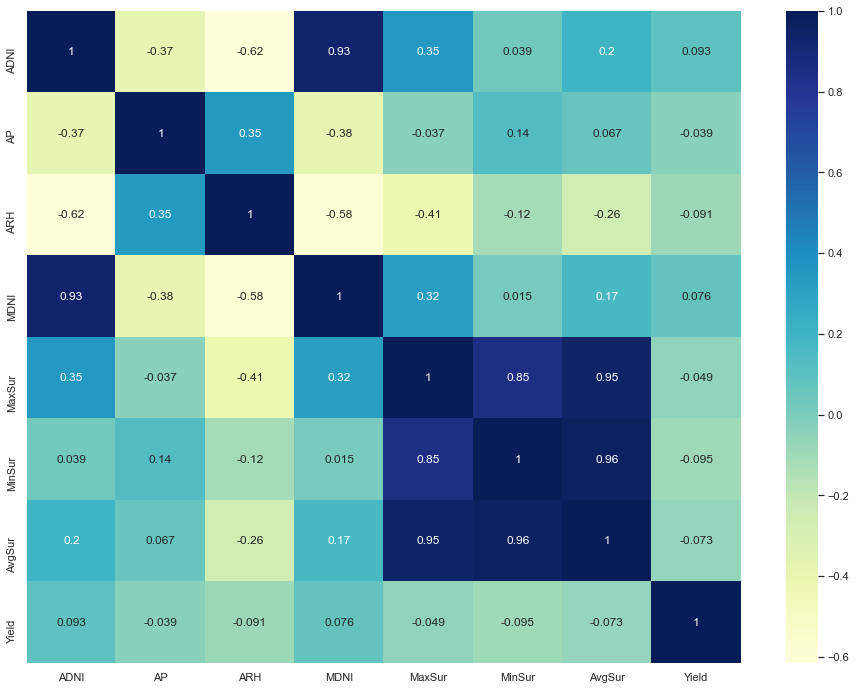

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,12))
sns.heatmap(train_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [16]:
train_other_df = pd.concat([other_df, yield_df], axis=1, join="inner")
train_other_df

,MG,Genotype_ID,State,Year,Location,Yield
0,3.0,243.0,7.0,2009.0,98.0,39.0
1,6.0,114.0,0.0,2013.0,16.0,54.2
2,4.0,2878.0,25.0,2015.0,72.0,73.6
3,3.0,4535.0,14.0,2014.0,94.0,70.9
4,3.0,4501.0,18.0,2008.0,45.0,82.1
...,...,...,...,...,...,...
93023,8.0,1774.0,0.0,2014.0,144.0,22.2
93024,4.0,1363.0,5.0,2008.0,17.0,68.6
93025,2.0,182.0,6.0,2006.0,150.0,65.6
93026,5.0,699.0,9.0,2008.0,1.0,43.5


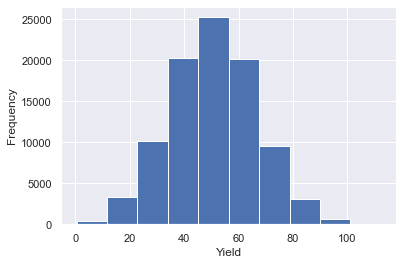

In [17]:
plt.xlabel("Yield")
train_other_df["Yield"].plot.hist()
plt.show()

<AxesSubplot:xlabel='Yield', ylabel='Year'>

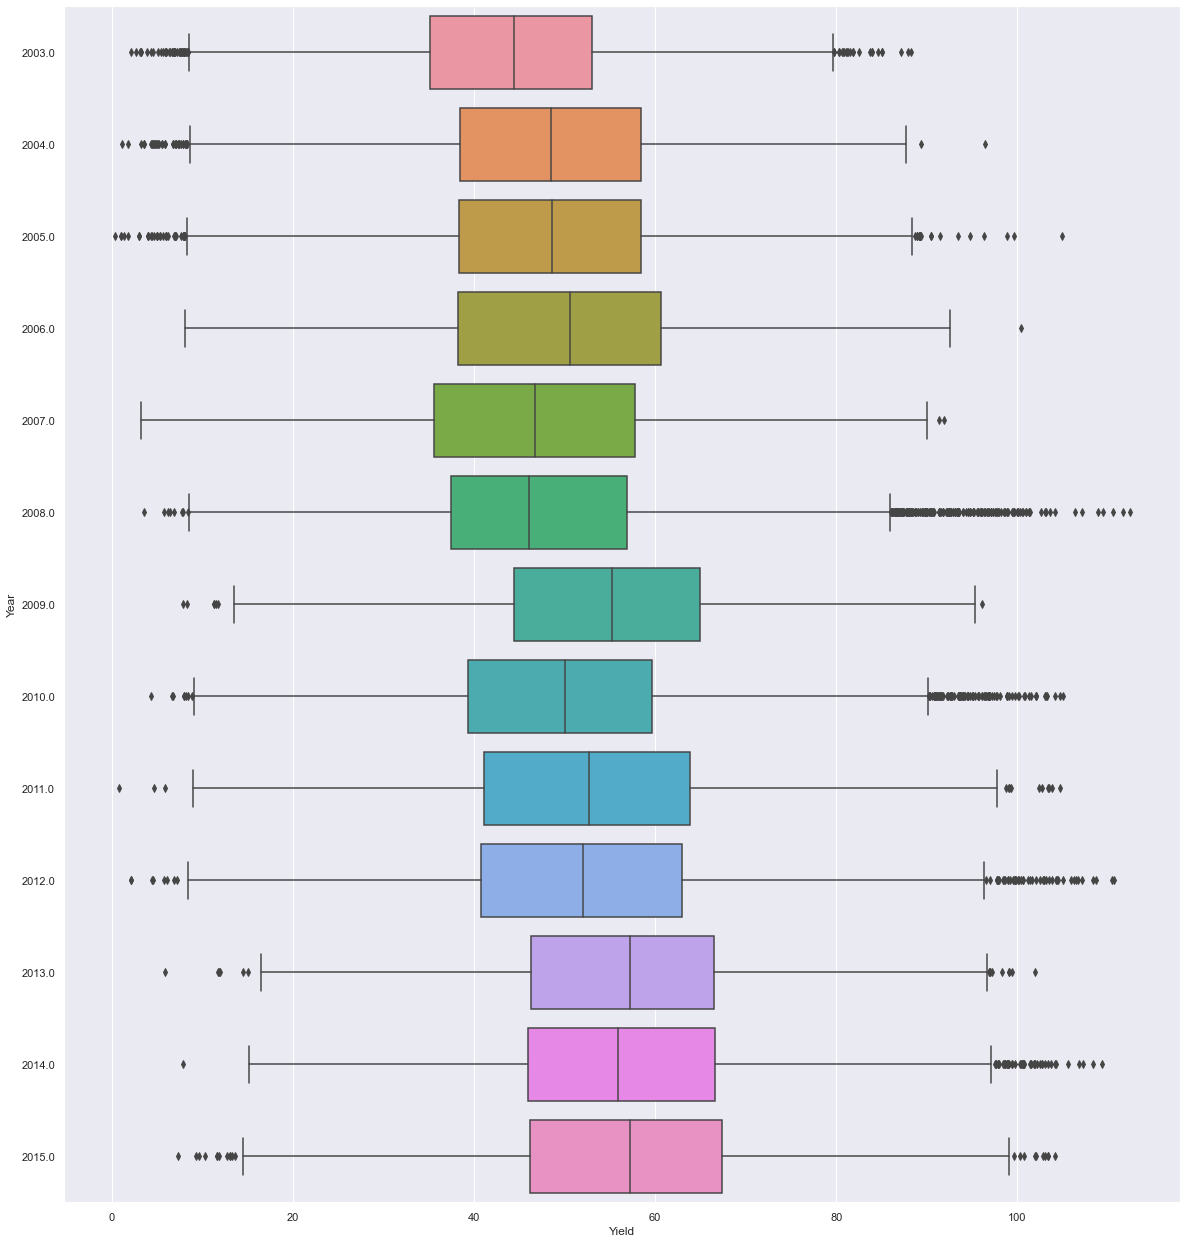

In [18]:
plt.figure(figsize=(20,22))
sns.boxplot(x=train_other_df['Yield'], y = train_other_df['Year'],orient="h")

In [19]:
Q1= train_other_df.quantile(0.25)
Q3 = train_other_df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

MG                3.0
Genotype_ID    2811.0
State            13.0
Year              6.0
Location         84.0
Yield            21.6
dtype: float64


In [20]:
train_other_df = train_other_df[~((train_other_df<(Q1-1.5*IQR)) | (train_other_df>(Q3+1.5*IQR))).any(axis=1)]
train_other_df.shape

(92505, 6)

### Maturity Group, Frequency

In [21]:
train_other_df["MG"].value_counts()

 4.0    17395
 2.0    14936
 3.0    13979
 5.0    12206
 1.0    10051
 0.0     7163
 6.0     5987
 7.0     4336
 8.0     3477
-1.0     2975
Name: MG, dtype: int64

<AxesSubplot:>

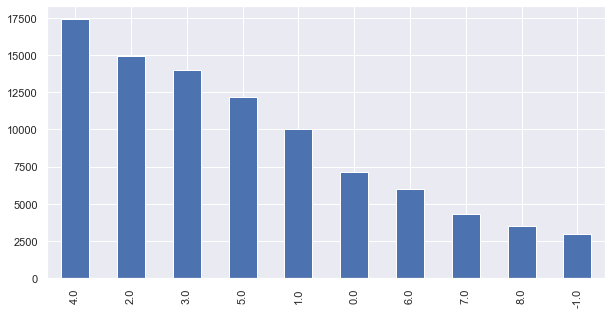

In [22]:
## Plot different feature against one another, against frequency
train_other_df.MG.value_counts().plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

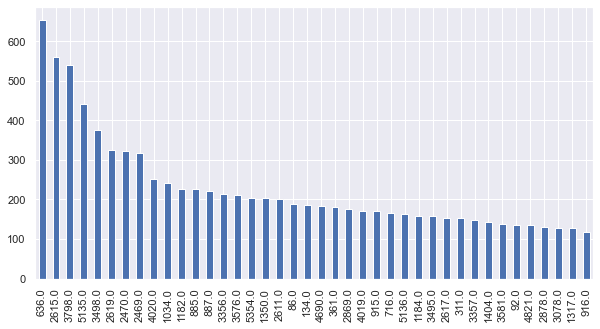

In [23]:
train_other_df.Genotype_ID.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

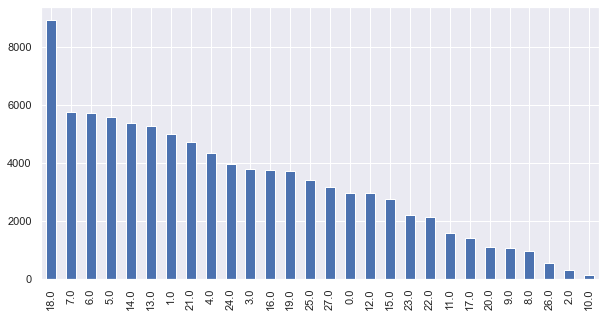

In [24]:
train_other_df.State.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

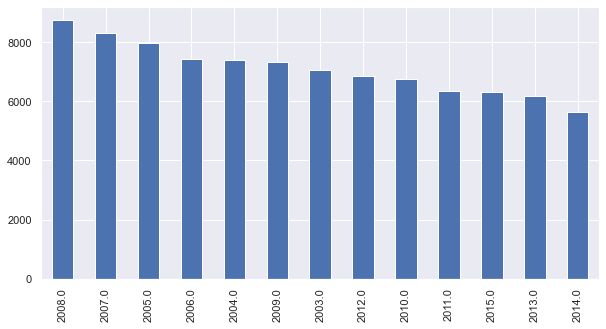

In [25]:
train_other_df.Year.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

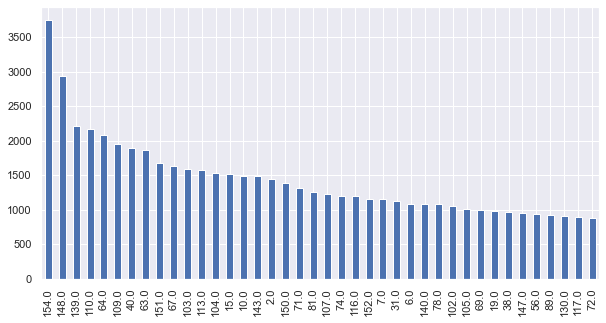

In [26]:
train_other_df.Location.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

<AxesSubplot:>

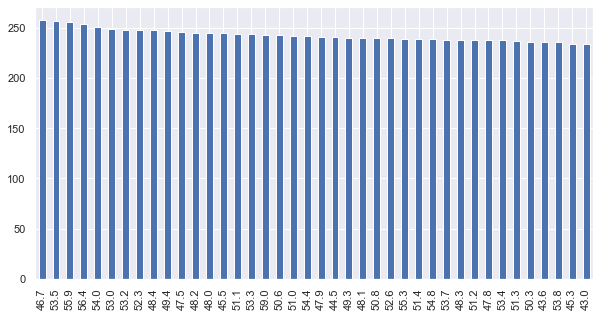

In [27]:
train_other_df.Yield.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

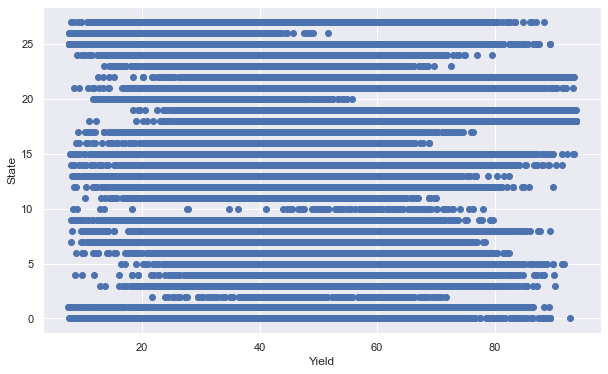

In [28]:
## Scatterplot
fig, ax = plt.subplots(figsize=(10,6))
plt.xlabel("Yield")
plt.ylabel("State")
ax.scatter(train_other_df['Yield'],train_other_df['State'])
plt.show() 

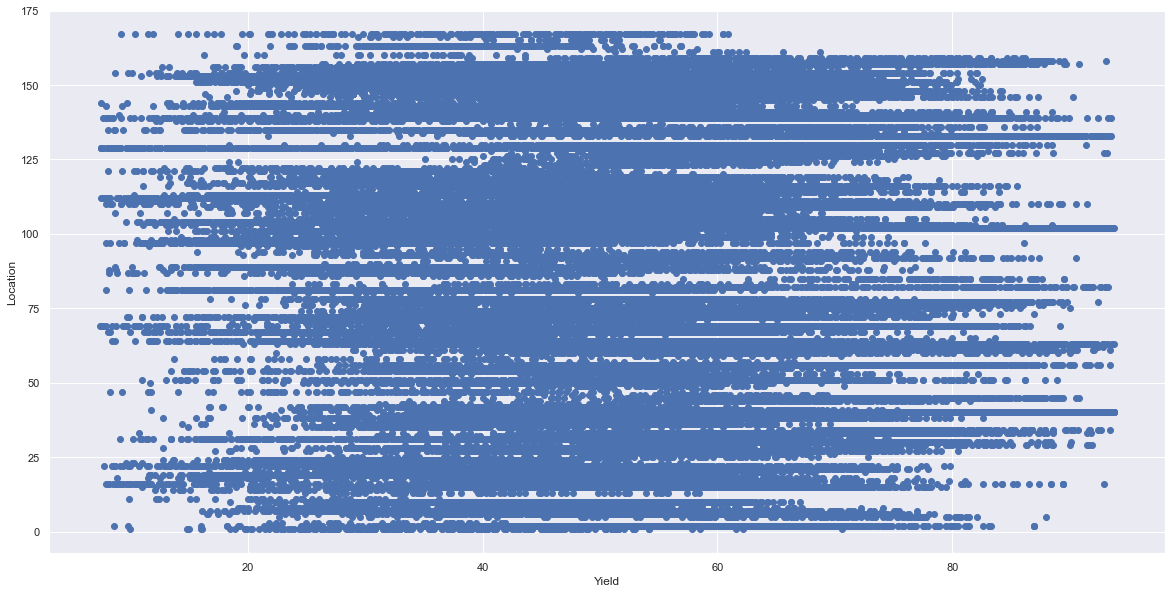

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xlabel("Yield")
plt.ylabel("Location")
ax.scatter(train_other_df['Yield'],train_other_df['Location'])
plt.show()